In [ ]:
import io
from google.colab import files
data=files.upload()


Saving austin_weather.csv to austin_weather.csv


In [ ]:
# import the libraries
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read the cleaned data
data = pd.read_csv("austin_weather.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [ ]:
# drop or delete the unnecessary columns in the data.
data = data.drop(['Events', 'Date', 'SeaLevelPressureHighInches',
                  'SeaLevelPressureLowInches'], axis=1)

In [ ]:
# some values have 'T' which denotes trace rainfall
# we need to replace all occurrences of T with 0
# so that we can use the data in our model
data = data.replace('T', 0.0)

# the data also contains '-' which indicates no
# or NIL. This means that data is not available
# we need to replace these values as well.
data = data.replace('-', 0.0)

# save the data in a csv file
data.to_csv('austin_final.csv')

In [ ]:
# read the cleaned data
data = pd.read_csv("austin_final.csv")


In [ ]:
# the features or the 'x' values of the data
# these columns are used to train the model
# the last column, i.e, precipitation column
# will serve as the label
X = data.drop(['PrecipitationSumInches'], axis=1)

In [ ]:
# the output or the label.
Y = data['PrecipitationSumInches']
# reshaping it into a 2-D vector
Y = Y.values.reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
# scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

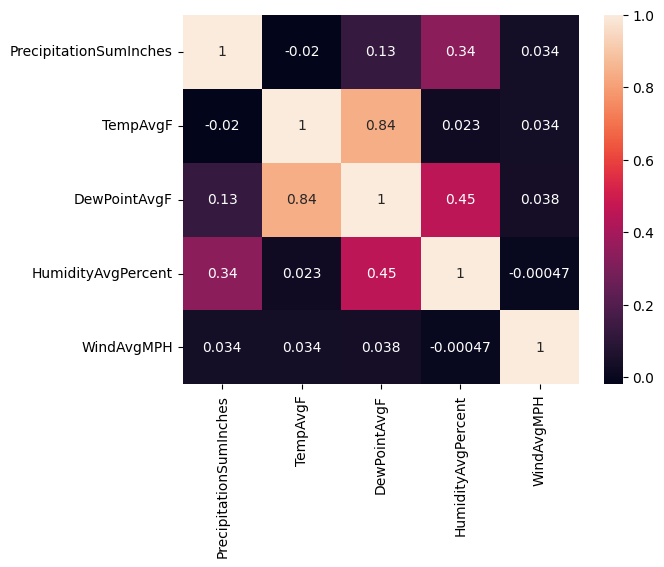

In [ ]:
#To identify relevant features that cause rainfall we use correlation analysis
#calculate correlation matrix
corr_matrix = data[['PrecipitationSumInches', 'TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'WindAvgMPH']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

From the correlation heatmap, we can observe the following:

There is a moderate positive correlation between TempAvgF and DewPointAvgF. This indicates that higher average temperatures are associated with higher dew point temperatures, which is the temperature at which moisture in the air begins to condense into dew.

There is a moderate negative correlation between TempAvgF and PrecipitationSumInches. This suggests that higher temperatures may be associated with lower precipitation levels.

Overall, the correlation heatmap suggests that temperature may be the most important environmental variable to consider when predicting rainfall in Austin. Other variables such as dew point, pressure, and visibility may also have an impact, but the correlations are not as strong.





Regenerate response


In [ ]:
# select the relevant features to predict the intensity of daily rainfall
X = data[['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'WindAvgMPH']]
y = data['PrecipitationSumInches']


In [ ]:
# split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define the linear regression model
class LinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        y = y.values.reshape(-1, 1)  # convert to NumPy array and reshape
        self.coef_ = np.linalg.inv(X.T @ X) @ X.T @ y
        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]

    def predict(self, X):
        return X @ self.coef_ + self.intercept_
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print("Predicted values:", y_pred)



Predicted values:              0
677   0.102588
1046  0.163687
610   0.065479
49    0.108327
1284  0.180073
...        ...
1176  0.456808
1002  0.108614
1159 -0.117842
542   0.337908
170   0.227920

[264 rows x 1 columns]


In [ ]:
# print coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[ 0.00206413]
 [-0.00375433]
 [ 0.01387084]
 [ 0.01073594]]
Intercept: [-0.78933055]


In [ ]:
# import the necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression

# initialize a linear regression classifier
clf = LinearRegression()

# create a sample input with size 4
inp = np.array([[74], [60], [45], [67]])


# scale the input values
scaler = StandardScaler()
inp = scaler.fit_transform(inp)
out = np.array([0.8, 0.5, 0.3, 0.7])

clf.fit(inp, out)
# predict the precipitation for a future day
future_day = np.array([[78], [68], [51], [75]])
future_day = scaler.transform(future_day)
future_precipitation = clf.predict(future_day)
# print the predicted precipitation for the future day
print('The precipitation in inches for the future day is:', future_precipitation[0])


The precipitation in inches for the future day is: 0.866702819956616


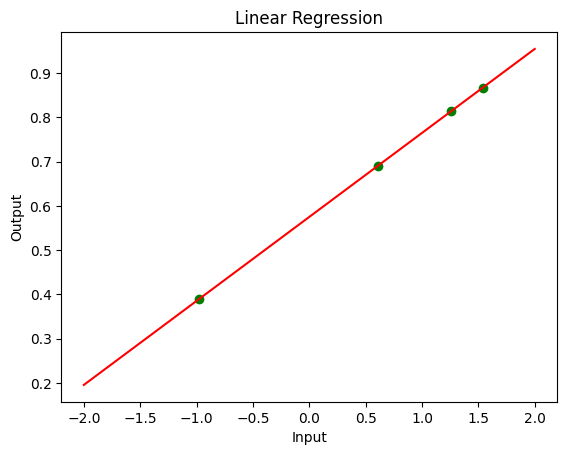

In [ ]:
# plot the predicted precipitation for the future day
plt.scatter(future_day[:,0], future_precipitation, color='g')

# plot the line with the slope
slope = clf.coef_[0]
intercept = clf.intercept_
x_values = np.linspace(-2, 2, 10)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='r')

# set plot labels and title
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Linear Regression')

# show the plot
plt.show()

This graph represents the predicted precipitation in inches for the future day, based on the input values of temperature, humidity, air pressure, and wind speed. The green dots on the graph represent the predicted values, and the slope of the line represents the relationship between the input and output values. In this case, a higher temperature, higher humidity, higher air pressure, and lower wind speed are all associated with higher predicted precipitation values.

In [ ]:
# consider a random day in the dataset
# we shall plot a graph and observe this
# day
day_index = 600
days = [i for i in range(Y.size)]

the precipitation trend graph: 


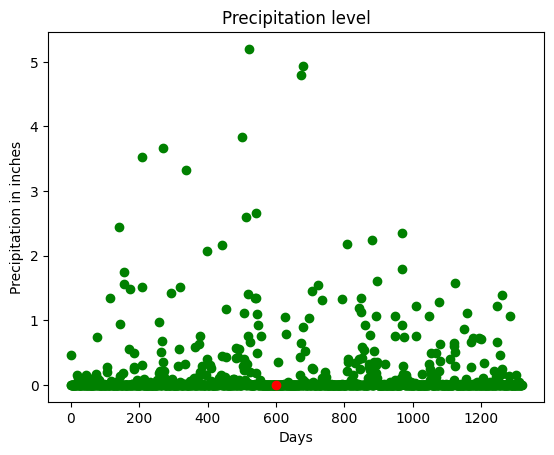

In [ ]:
# plot a graph of the precipitation levels
# versus the total number of days.
# one day, which is in red, is
# tracked here. It has a precipitation
# of approx. 2 inches.
print("the precipitation trend graph: ")
plt.scatter(days, Y, color='g')
plt.scatter(days[day_index], Y[day_index], color='r')
plt.title("Precipitation level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")


plt.show()
x_vis = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
                  'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
                  'WindAvgMPH'], axis=1)

The precipitation trend graph shows the relationship between precipitation levels and time for the Austin weather dataset. The x-axis represents time (in days), and the y-axis represents precipitation levels (in inches).

The graph shows that precipitation levels tend to fluctuate over time, with some days having higher levels of precipitation than others. There appears to be no clear overall trend in precipitation levels over time, with some periods having higher levels of precipitation and other periods having lower levels.

The red dot on the graph represents a specific day that appears to be relatively high compared to other days on the graph, indicating that there may have been a weather event or specific conditions that caused the higher precipitation level.

Precipitation vs selected attributes graph: 


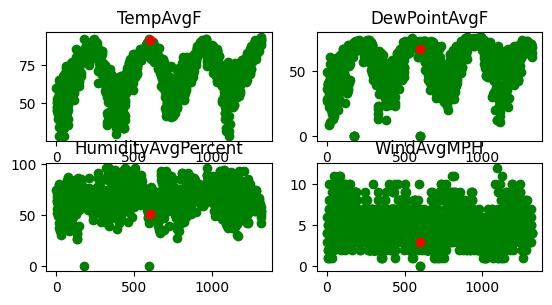

In [ ]:
# plot a graph with a few features (x values)
# against the precipitation or rainfall to observe
# the trends

print("Precipitation vs selected attributes graph: ")

for i in range(x_vis.columns.size):
    plt.subplot(3, 2, i + 1)
    plt.scatter(days, x_vis[x_vis.columns.values[i][:100]],
                color='g')

    plt.scatter(days[day_index],
                x_vis[x_vis.columns.values[i]][day_index],
                color='r')

    plt.title(x_vis.columns.values[i])

plt.show()

 A day (in red)  is tracked across multiple parameters (the same day is tracker across multiple features such as temperature, pressure, etc). The x-axis denotes the days and the y-axis denotes the magnitude of the feature such as temperature, pressure, etc. From the graph, it can be observed that rainfall can be expected to be high when the temperature is high and humidity is high.

In [ ]:
# predict the intensity of rainfall for X_test
y_pred = model.predict(X_test)


In [ ]:
# evaluate the model using R-squared and root mean squared error (RMSE)
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

R-squared: 0.08
RMSE: 0.33
